In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
df = pd.read_csv("data/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.isnull().sum()


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

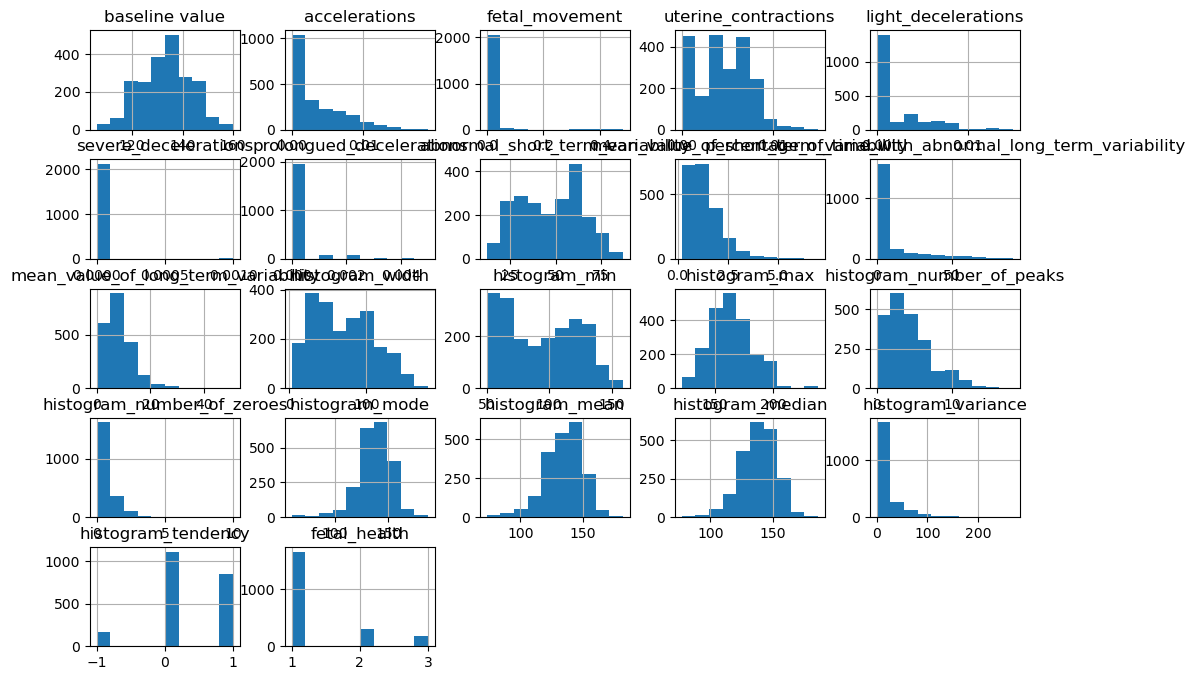

In [4]:
df.hist(figsize=(12,8))
plt.show()

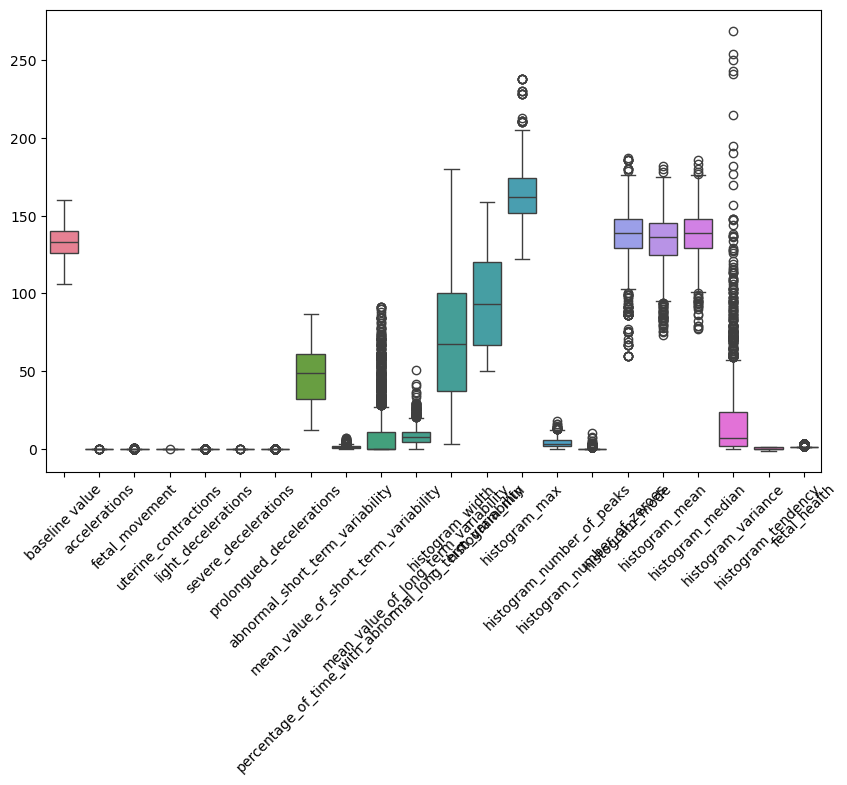

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=45)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["baseline value"]]
y = df["accelerations"]

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

print("R² Skoru:", lr.score(X, y))


R² Skoru: 0.006489869842314366


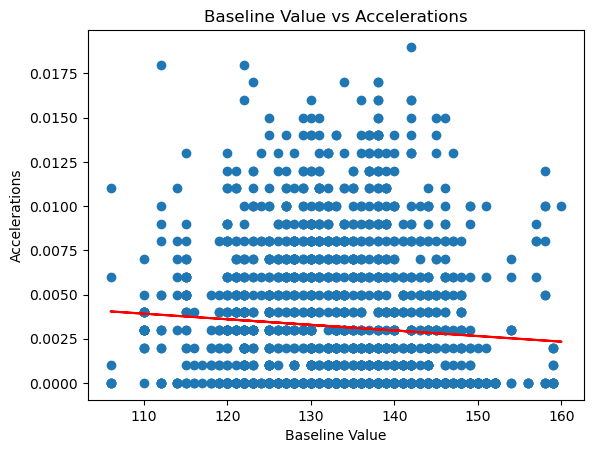

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("Baseline Value")
plt.ylabel("Accelerations")
plt.title("Baseline Value vs Accelerations")
plt.show()


In [8]:
X = df.drop("fetal_health", axis=1)
y = df["fetal_health"]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average="macro"))
    print("Recall:", recall_score(y_true, y_pred, average="macro"))
    print("F1 Score:", f1_score(y_true, y_pred, average="macro"))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [17]:
evaluate(y_test, y_pred_lr)


Accuracy: 0.8802816901408451
Precision: 0.7781871217645776
Recall: 0.782934874529702
F1 Score: 0.780507174586942
Confusion Matrix:
 [[311  19   3]
 [ 18  42   4]
 [  2   5  22]]


In [20]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 1
best_score = 0

for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    score = knn_temp.score(X_test_scaled, y_test)
    
    if score > best_score:
        best_k = k
        best_score = score

print("En iyi k:", best_k)


En iyi k: 3


In [21]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


In [22]:
evaluate(y_test, y_pred_knn)


Accuracy: 0.92018779342723
Precision: 0.8659353390536187
Recall: 0.8503395637016326
F1 Score: 0.8559729975914657
Confusion Matrix:
 [[322   9   2]
 [ 17  44   3]
 [  2   1  26]]


In [24]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)


In [25]:
evaluate(y_test, y_pred_svm)


Accuracy: 0.903755868544601
Precision: 0.8523629148629149
Recall: 0.8097742138690415
F1 Score: 0.8285213653518925
Confusion Matrix:
 [[317  15   1]
 [ 17  46   1]
 [  2   5  22]]


In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [27]:
evaluate(y_test, y_pred_dt)


Accuracy: 0.9225352112676056
Precision: 0.8806582481117164
Recall: 0.8954924752338544
F1 Score: 0.8876883376472899
Confusion Matrix:
 [[314  17   2]
 [ 12  52   0]
 [  2   0  27]]
